In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
# Load csv files in to data frames. 
train_df = pd.read_csv(Path('Resources/2019loans.csv', index = False))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv', index = False))

# Data Preprocessing

In [3]:
# Drop unneccessary columns from training set
train_df.drop(columns = ["Unnamed: 0", "index"], inplace = True)
# print(len(train_df.info()))

# Drop unnecessary columns from testing set
test_df.drop(columns = ["Unnamed: 0", "index", "loan_status",
                        ], inplace = True)
# print(len(test_df.info()))

In [4]:
# Find any null values in the data 
train_df.isna().sum()

loan_amnt                     0
int_rate                      0
installment                   0
home_ownership                0
annual_inc                    0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
debt_settlement_flag          0
Length: 84, dtype: int64

In [5]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [6]:
# Find unique values of columns to know the nature of values
print(train_df.hardship_flag.unique())
print(train_df.debt_settlement_flag.unique())
print(train_df.pymnt_plan.unique())
print(train_df.verification_status.unique())
print(train_df.home_ownership.unique())

['N' 'Y']
['N' 'Y']
['n']
['Not Verified' 'Source Verified' 'Verified']
['MORTGAGE' 'RENT' 'OWN' 'ANY']


In [7]:
# Find if any duplicate rows
sum(train_df.duplicated())

0

In [8]:
# Convert categorical data to numeric and separate target feature for training data
clean_train_df = train_df.iloc[:, train_df.columns != 'loan_status']
X = pd.get_dummies(clean_train_df)

#  Convert test_df categorical data to numeric
X_pred = pd.get_dummies(test_df)

# Find number of columns in the training and testing data set
print(f"X: {len(X.columns)} columns, X_pred: {len(X_pred.columns)} columns")

X: 92 columns, X_pred: 91 columns


In [9]:
# Column length is different, So, find which column is missing in X_pred
X.columns.difference(X_pred.columns)

Index(['debt_settlement_flag_Y'], dtype='object')

* In X_pred dataframe, column 'debt_settlement_flag_Y' is missing.  Add this column with column values equal to zero. 

In [10]:
X_pred['debt_settlement_flag_Y'] = 0

# print(len(X.columns), len(X_pred.columns))
X.columns.difference(X_pred.columns)

Index([], dtype='object')

In [11]:
# Create y values
y = train_df['loan_status'].map({'high_risk': 1, 'low_risk': 0})

# Logistic Regression Model

In [12]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [14]:
# Fit the model
lr.fit(X_train, y_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:

print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.6517710532488857
Testing Data Score: 0.6488779419813903


In [16]:
# Make predictions on training data set
print(f'Actual:\t\t{list(y_test[:15])}')
print(f'Predicted:\t{list(lr.predict(X_test[:15]))}')

Actual:		[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]
Predicted:	[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]


In [17]:
# Make prediction on the test data set
print(f"Testing Data Score: {lr.predict(X_pred[:20])}")

Testing Data Score: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [18]:
# Evaluate test set
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
mtx = confusion_matrix(y_test, y_pred)

In [19]:
# Find accuracy and precision matrix
from sklearn.metrics import accuracy_score, precision_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))

Accuracy: 0.6488779419813903
Precision: 0.662718204488778


# Analysis

* This Logistic Regression Classification shows a rate of 65% of low risk accuracy.

* Precision is about being precise, i.e.when a model makes a prediction, how often it is correct. Here, the precision shows, the  predicted low risk of accuracy will be correct for 66% of the time.

# Confusion matrix heatmap

Text(0.5, 257.44, 'Predicted')

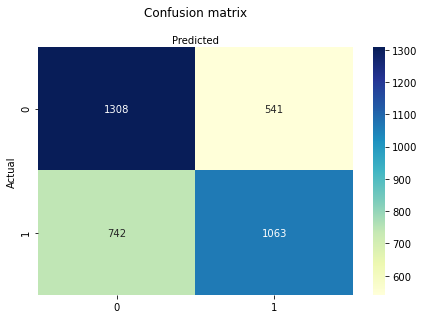

In [20]:
%matplotlib inline
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Random Forest Classification Model

In [134]:
# Import random forest model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(max_depth = 3,min_samples_split=3,
                           n_estimators=100)

#Train the model using the training sets 
rfc.fit(X_train,y_train)

print(f"Training score : {rfc.score(X_train, y_train)}")
print(f"Testing score : {rfc.score(X_test, y_test)}")


Training score : 0.726718273516303
Testing score : 0.7162014230979749


In [136]:
# Predict the score with test.csv(Dataframe - X_pred)
print(f"Predicting score: {rfc.predict(X_pred)[:20]}")

Predicting score: [0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1]


* Training and testing score of Random Forest Classification is almost similar, while testing the training model in new data shows the predicition as a realistic one and it is more accurate that logistic regression model.

# Logistic Regression Scaled

In [117]:
# Scale the data set
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)

In [132]:
# Train the Logistic Regression model on the scaled data and print the model score
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
lr.fit(X_train_scaled, y_train)
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")
# Predict in the test.csv file
print(f"Testing Data Score: {lr.predict(X_pred[:20])}")

Training Data Score: 0.7017358667604973
Testing Data Score: 0.6915708812260536
Testing Data Score: [1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1]


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
y_pred_scaled = lr.predict(X_test_scaled)
mtx = confusion_matrix(y_test, y_pred_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Precision:",precision_score(y_test, y_pred_scaled))


Accuracy: 0.6915708812260536
Precision: 0.7047101449275363


* Scaled Logistic Regression model shows 4% more accuracy and precision than the previous 65% accuracy in normal Logistic Regression model. While comparing the predictions of two models of scaled and unscaled, scaled shows more high risk customers, somewhat looks a weird overfitting result.

# Random Forest Classifier Scaled

In [120]:
# Train a Random Forest Classifier model and print the model score

rfc.fit(X_train_scaled, y_train)
print(f"Training score : {rfc.score(X_train_scaled, y_train)}")
print(f"Testing score : {rfc.score(X_test_scaled, y_test)}")

Training score : 0.7275392915787005
Testing score : 0.7162014230979749


In [126]:
# Evaluating on test data
print(f"Predicting score: {rfc.predict(X_pred)[:15]}")

Predicting score: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


* Even though the training and testing score looks almost similar, while testing on new data, the prediction shows somewhat weird result, looks overfitting.